In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import seaborn as sns
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 3})
sns.set_style('ticks',
              {'grid.linestyle': 'none', 'axes.edgecolor': '0',
               'axes.linewidth': 1.2, 'legend.frameon': True,
               'xtick.direction': 'out', 'ytick.direction': 'out',
               'xtick.top': True, 'ytick.right': True,
              })

import sys

In [2]:
from cpymad.madx import Madx

In [3]:
from scipy.constants import e, m_p, c

from scipy.constants import physical_constants

In [4]:
madx = Madx(stdout=sys.stdout)
madx.options.echo = False
madx.options.warn = True
madx.options.info = True


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.10 13:35:49      +
  ++++++++++++++++++++++++++++++++++++++++++++


In [5]:
madx.call('./SIS100RING_COLD.seq')

++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy
++++++ info: element redefined: driftdummy


In [6]:
nmass = physical_constants['atomic mass constant energy equivalent in MeV'][0] * 1e-3

A = 238
Q = 28

Ekin_per_nucleon = 0.2e9 # in eV

###

mass = A * nmass * 1e9 * e / c**2 # in kg
charge = Q * e # in Coul

Ekin = Ekin_per_nucleon * A
p0c = np.sqrt(Ekin**2 + 2*Ekin*mass/e * c**2) # in eV

Etot = np.sqrt(p0c**2 + (mass/e)**2 * c**4) * 1e-9 # in GeV
p0 = p0c / c * e # in SI units
gamma = np.sqrt(1 + (p0 / (mass * c))**2)
beta = np.sqrt(1 - gamma**-2)

In [7]:
madx.command.beam(particle='ion', mass=A*nmass, charge=Q, energy=Etot)

True

In [8]:
madx.call('./SIS100_VIRTUAL_FAST.str')

In [9]:
madx.use(sequence='sis100ring')

In [10]:
madx.sequence.sis100ring.expanded_elements[16]

s11qd11: quad_cold_star, at=8.7251, k1=-0.224043322506056, from=cell_11;

In [11]:
madx.sequence.sis100ring.expanded_elements[23]

s11qd12: quad_cold_star, at=11.3251, k1=0.22487395996129375, from=cell_11;

In [12]:
assert madx.command.select(
    flag='MAKETHIN',
    class_='QUADRUPOLE',
    slice_='9',
)

assert madx.command.select(
    flag='MAKETHIN',
    class_='SBEND',
    slice_='9',
)

assert madx.command.makethin(
    makedipedge=True,
    style='teapot',
    sequence='sis100ring',
)

makethin: style chosen : teapot
makethin: slicing sequence : sis100ring


In [13]:
madx.command.seqedit(sequence='sis100ring')
for s_marker in np.linspace(start=0, stop=1083.6, num=10000, endpoint=False)[1:]:
    madx.command.install(element='Marker', at=s_marker)
madx.command.flatten()
madx.command.endedit()

++++++ info: seqedit - number of elements installed:  9999
++++++ info: seqedit - number of elements moved:      0
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0


True

In [14]:
madx.use(sequence='sis100ring')

In [15]:
twiss = madx.twiss();

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
            1083.6                 -0     0.004194486952        15.44047214 

                q1                dq1            betxmax              dxmax 
       18.87929937       -39.95355367        19.60918074        3.094408448 

             dxrms             xcomax             xcorms                 q2 
       1.289694075                  0                  0        18.79928904 

               dq2            betymax              dymax              dyrms 
      -39.77610643        19.69631848                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [16]:
s = np.array(twiss['s']).copy()
bx = np.array(twiss['betx']).copy()
by = np.array(twiss['bety']).copy()

In [17]:
madx.sequence.sis100ring.expanded_elements[215]

s11qd11..9: quad_cold_star..9, at=9.28535, lrad=0.13833333333333334, knl={0.0,-0.030992659613337747,0.0,0.0}, apertype=ellipse, aperture={0.07,0.07};

In [18]:
madx.sequence.sis100ring.expanded_elements[257]

s11qd12..1: quad_cold_star..1, at=10.764850000000001, lrad=0.13833333333333334, knl={0.0,0.031107564461312305,0.0,0.0}, apertype=ellipse, aperture={0.07,0.07};

In [19]:
madx.command.seqedit(sequence='sis100ring')
madx.command.select(flag='seqedit', clear=True)
madx.command.select(flag='seqedit', pattern='s11qd11')
madx.command.move(element='selected', by=-0.5e-3)
madx.command.select(flag='seqedit', clear=True)
madx.command.select(flag='seqedit', pattern='s11qd12')
madx.command.move(element='selected', by=0.5e-3)
madx.command.endedit()

++++++ info: seqedit - number of elements installed:  0
++++++ info: seqedit - number of elements moved:      20
++++++ info: seqedit - number of elements removed:    0
++++++ info: seqedit - number of elements replaced:   0


True

In [20]:
madx.use(sequence='sis100ring')

In [21]:
madx.sequence.sis100ring.expanded_elements[215]

s11qd11..9: quad_cold_star..9, at=9.284849999999999, lrad=0.13833333333333334, knl={0.0,-0.030992659613337747,0.0,0.0}, apertype=ellipse, aperture={0.07,0.07};

In [22]:
madx.sequence.sis100ring.expanded_elements[257]

s11qd12..1: quad_cold_star..1, at=10.765350000000002, lrad=0.13833333333333334, knl={0.0,0.031107564461312305,0.0,0.0}, apertype=ellipse, aperture={0.07,0.07};

In [23]:
twiss = madx.twiss();

enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
            1083.6                 -0     0.004194486693        15.44047262 

                q1                dq1            betxmax              dxmax 
       18.87934776       -39.95370776        19.62041272        3.094552703 

             dxrms             xcomax             xcorms                 q2 
       1.289696253                  0                  0        18.79933752 

               dq2            betymax              dymax              dyrms 
      -39.77624776        19.70467555                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            

In [24]:
s_perturbed = np.array(twiss['s']).copy()
bx_perturbed = np.array(twiss['betx']).copy()
by_perturbed = np.array(twiss['bety']).copy()

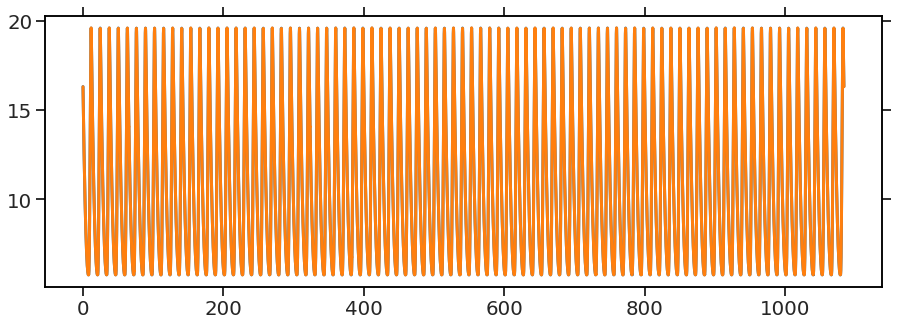

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(s, bx)
plt.plot(s_perturbed, bx_perturbed)
# plt.xlim(0, 200)

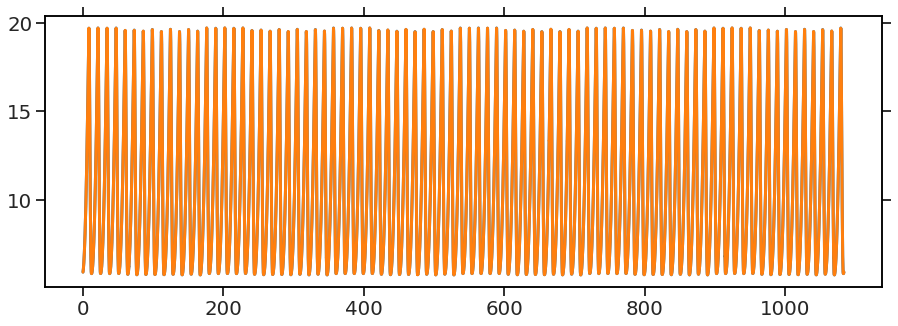

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(s, by)
plt.plot(s_perturbed, by_perturbed)
# plt.xlim(0, 200)

In [27]:
s_interp = np.unique(np.concatenate((s_perturbed, s)))
assert all(np.diff(s_interp) >= 0)
bx_interp = np.interp(s_interp, s, bx)
by_interp = np.interp(s_interp, s, by)
bx_perturbed_interp = np.interp(s_interp, s_perturbed, bx_perturbed)
by_perturbed_interp = np.interp(s_interp, s_perturbed, by_perturbed)

beta-beat: $\sqrt{\oint ds~\left(\frac{\beta_{perturbed} - \beta_{virtual}}{\beta_{virtual}}\right)^2}$

In [28]:
np.sqrt(np.trapz(((bx_perturbed_interp - bx_interp) / bx_interp)**2, s_interp))

0.013737443416189866

In [29]:
np.sqrt(np.trapz(((by_perturbed_interp - by_interp) / by_interp)**2, s_interp))

0.009914098806563564

Text(0.5, 0, '$s$ [m]')

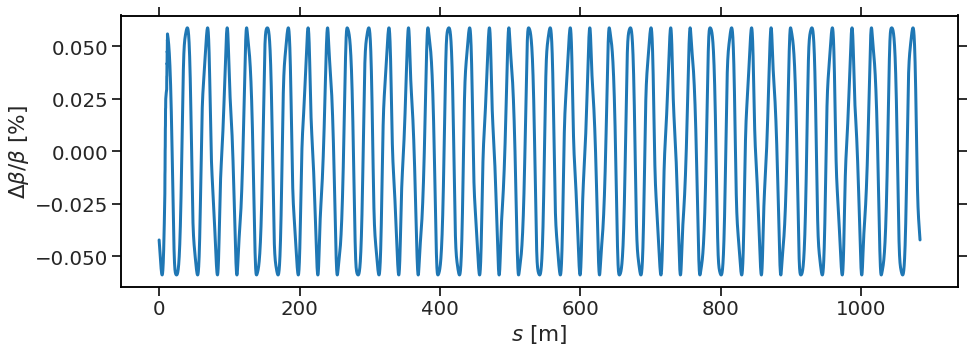

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(s_interp, (bx_perturbed_interp - bx_interp) / bx_interp * 1e2)
# plt.xlim(0, 200)
plt.ylabel(r'$\Delta\beta/\beta$ [%]')
plt.xlabel('$s$ [m]')